# Minimal network motifs: Positive Feedback Loop

A positive feedback loop is a system where the product of transcription activates directly or indirectly the expression of the mRNA.  A classic example of positive feedback is the lac operon in E. coli. Positive feedback plays an integral role in cellular differentiation, development, and cancer progression, and therefore, positive feedback in gene regulation can have significant physiological consequences. Random motions in molecular dynamics coupled with positive feedback can create population of phenotypically different cells from the same parent cell. Perharps, the most simple and direct system with a positive feedback is a protein `p` that activates the expression of its own `mRNA`. We can write a set of differential equations  based on the model of the Central Dogma, using the Hill function for activators, and setting the protein `p`as its own transcription factor. 

$$
\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  \alpha_m \frac{[P]^n}{K^n+[P]^n}-\gamma_M[M] \tag{6}\\ 
\frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P]
\end{align*}
$$

We take advantage of a basic mode of transcription-translation, where the production of mRNA `M` is regulated using a Hill function. The mRNA then transforms intro protein `P`. To encode for a positive feedback, we set the protein `P` as an activator (using the activating form of the Hill function) of the expression of its own mRNA. We will start by building the ODE problem for this positive regulation and compare its dynamical properties with a linear system, where the activation of transcriptions is performed by another protein `T`.

In [1]:
using Plots; gr()
using DifferentialEquations

In [2]:
PositiveFeedback! = @ode_def ab begin
   dM = -γ_M*M+α_M*P^n/(K^n +P^n)
   dP =   α_P * M - γ_P * P
    end α_M γ_M T n α_P γ_P K

(::ab{getfield(Main, Symbol("##3#7")),getfield(Main, Symbol("##4#8")),getfield(Main, Symbol("##5#9")),Nothing,Nothing,getfield(Main, Symbol("##6#10")),Expr,Expr}) (generic function with 2 methods)

In [3]:
NoFeedback! = @ode_def ab begin
   dM = -γ_M*M+α_M*T^n/(K^n +T^n)
   dP =   α_P * M - γ_P * P
    end α_M γ_M T n α_P γ_P K

(::ab{getfield(Main, Symbol("##11#15")),getfield(Main, Symbol("##12#16")),getfield(Main, Symbol("##13#17")),Nothing,Nothing,getfield(Main, Symbol("##14#18")),Expr,Expr}) (generic function with 2 methods)

## Positive feedback loops show slower responses compared to linear networks
We start by comparing the simples case, of Hill coefficient `n=1`. we will set the value of transcription factor `T` as the steady state value of the protein `P`, in order to maintain the same input intensity of the transcription.  We can see that the steady state is reached faster when proteins are inside a negative feedback loop. 

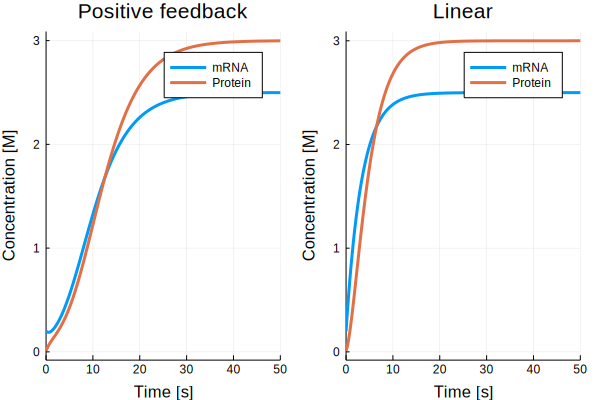

In [4]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
n=1
K=1
k_m=1
D=1
T=3
α_M=k_m*D
γ_M=0.3
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,T,n,α_P,γ_P,K];

prob1 = ODEProblem(PositiveFeedback!,u₀,tspan,p)
prob2 = ODEProblem(NoFeedback!,u₀,tspan,p)

sol1 = solve(prob1)
P1=plot(sol1,label=["mRNA","Protein"])
title!("Positive feedback")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

sol2 = solve(prob2)
P2=plot(sol2,label=["mRNA","Protein"])
title!("Linear")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

plot(P1,P2,layout=(1,2),legend=true)

## Postitive feedback loops reduce the robustness against changes in a parameter 

We will change in a loop the degradation of the mRNA protein, and compare how much the output, in terms of protein levels, changes as the parameter changes. 

In [5]:
function PlotPositiveFeedback(γ_M)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(PositiveFeedback!,u₀,tspan,p)
     sol1 = solve(prob1)
     x=("gamma_M = $(γ_M)")
     plot!(sol1,vars=(2),label=x,ylims = (0,15)) 
end

PlotPositiveFeedback (generic function with 1 method)

In [6]:
function PlotLinear(γ_M)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(NoFeedback!,u₀,tspan,p)
     sol1 = solve(prob1)
     x=("gamma_M = $(γ_M)")
     plot!(sol1,vars=(2),label=x,ylims = (0,15))  
end

PlotLinear (generic function with 1 method)

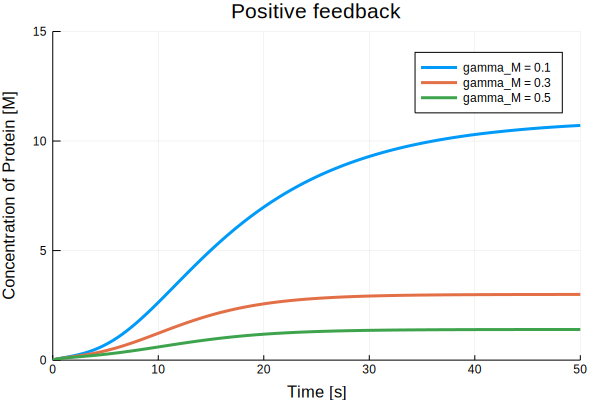

In [7]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
plot()
for i in [0.1,0.3, 0.5]
    plot(PlotPositiveFeedback(i),legend=true)
end
     xlabel!("Time [s]")
       ylabel!("Concentration of Protein [M]")
     title!("Positive feedback")

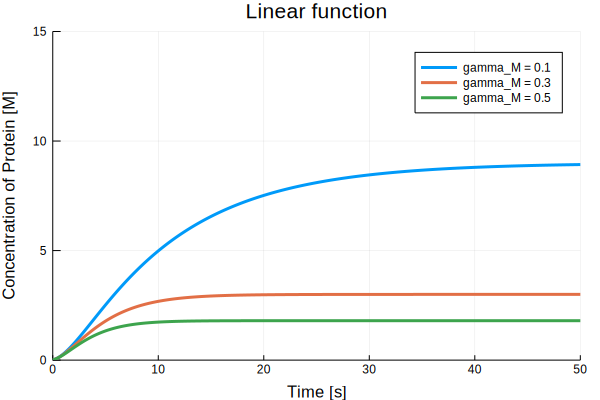

In [8]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
plot()
for i in [0.1,0.3, 0.5]
    PlotLinear(i)
end
 xlabel!("Time [s]")
     ylabel!("Concentration of Protein [M]")
 title!("Linear function")

Now we will perform the same study of robustness, but changing the parameter `K`

In [9]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
n=1
K=1
k_m=1
D=1
T=3
α_M=k_m*D
γ_M=0.3
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,T,n,α_P,γ_P,K];

In [10]:
function PlotPositiveFeedback(K)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(PositiveFeedback!,u₀,tspan,p)
     x=("K = $(K)")
     sol1 = solve(prob1)
     plot!(sol1,vars=(2),label=x,ylims = (0,4))
end

function PlotLinear(K)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(NoFeedback!,u₀,tspan,p)
     sol1 = solve(prob1)
     x=("K = $(K)")
     plot!(sol1,vars=(2),label=x,ylims = (0,4))  
end

PlotLinear (generic function with 1 method)

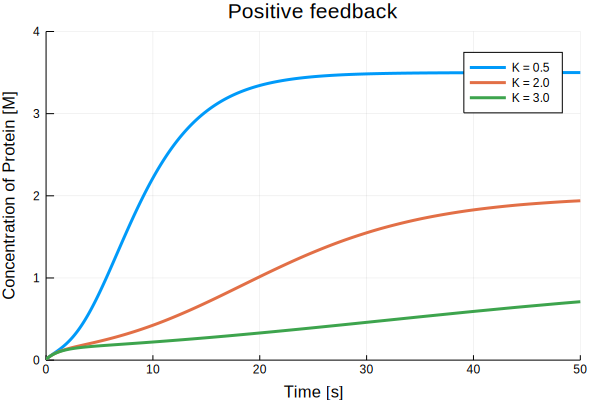

In [11]:
u0 = [0.2,0.01]
γ_M=0.3
tspan = (0.0,50.0)
plot()
for i in [0.5,2,3]
    PlotPositiveFeedback(i)
end
     xlabel!("Time [s]")
      ylabel!("Concentration of Protein [M]")
     title!("Positive feedback")

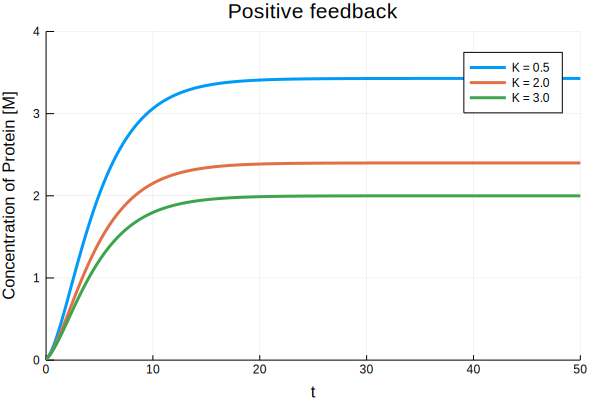

In [12]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
plot()
for i in [0.5,2,3]
    PlotLinear(i)
end
 title!("Linear function")
  ylabel!("Concentration of Protein [M]")
     title!("Positive feedback")

## Positive Feedbacks are very sensitive is systems with Cooperativity

In [13]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
n=1
K=1
k_m=1
D=1
T=3
α_M=k_m*D
γ_M=0.3
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,T,n,α_P,γ_P,K];

In [14]:
function PlotPositiveFeedback(n)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(PositiveFeedback!,u₀,tspan,p)
     x=("n = $(n)")
     sol1 = solve(prob1)
     plot!(sol1,vars=(2),label=x,ylims = (0,4))
end

function PlotLinear(n)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(NoFeedback!,u₀,tspan,p)
     sol1 = solve(prob1)
     x=("n = $(n)")
     plot!(sol1,vars=(2),label=x,ylims = (0,4))  
end

PlotLinear (generic function with 1 method)

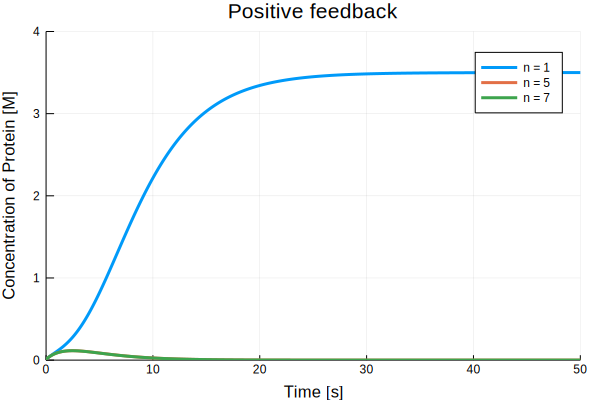

In [15]:
K=0.5
plot()
for i in [1,5,7]
    PlotPositiveFeedback(i)
end
     xlabel!("Time [s]")
      ylabel!("Concentration of Protein [M]")
     title!("Positive feedback")

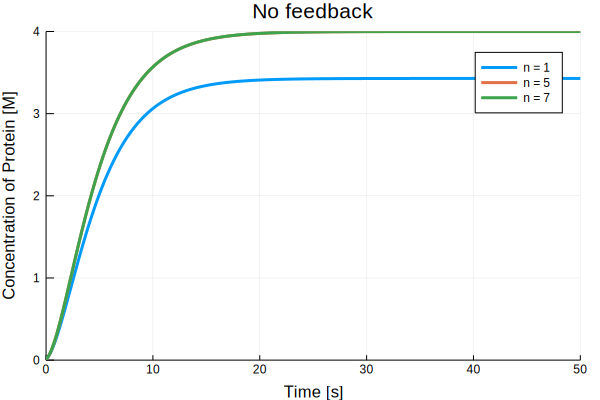

In [16]:
plot()
for i in [1,5,7]
    PlotLinear(i)
end
     xlabel!("Time [s]")
      ylabel!("Concentration of Protein [M]")
     title!("No feedback")

## Positive Feedbacks can add a delay in signal activation

This delay occurs because there is a longer excursion in the phase space, because the positive feedback can gerenate more basins of atraction. (see next section)

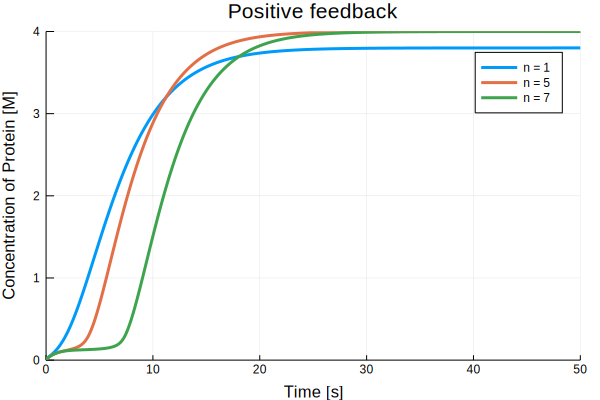

In [17]:
K=0.2
plot()
for i in [1,5,7]
    PlotPositiveFeedback(i)
end
     xlabel!("Time [s]")
      ylabel!("Concentration of Protein [M]")
     title!("Positive feedback")

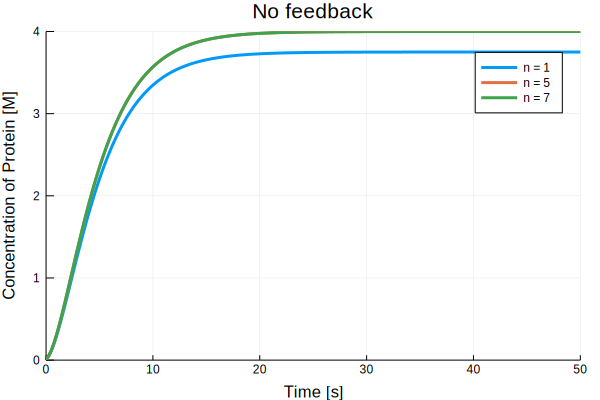

In [18]:
plot()
for i in [1,5,7]
    PlotLinear(i)
end
     xlabel!("Time [s]")
      ylabel!("Concentration of Protein [M]")
     title!("No feedback")

## Positive Feedbacks can amplify noisy input

we will test how well a system with a positive feedback behaves when ne of teh variabes has a stochastic component. As before, we will define a function to add additive noise into all variables of a system of differential equations in the following general formulation

$$
du=f(u,p,t)dt+g(u,p,t)dW
$$

Solving `SDEs` is done in the same way as `ODEs` in Julia. In the case of additive noise, `g` is simply a matrix of values. The simplest case is diagonal noise, where g is a diagonal matrix, with components $\lambda_i$. This means that every function in the system gets a different random number of similar amplitude. We simply define both `f` and `g` as in-place functions. Thus `f(du,u,p,t)` gives the deterministic change, and `g(du,u,p,t)` gives the stochastic portion of the equation. This way, the amplitude of noise is defined as $\lambda_i$ *N(0,dt) where `N` is the normal distribution.

The general formulation for `SDEs` in Julia is the following

`prob = SDEProblem(f!,g!,u₀,tspan,p)`

At this point, we will only add noise in the mRNA porduction, trying to mimic the inherent variability of due to staochasticity in activation and deactivation of gene transcripton. 

In [25]:
NoiseFunction! = @ode_def negFB begin
   dM = 0.06
   dP = 0.0
    end α_M γ_M T n α_P γ_P K

(::negFB{getfield(Main, Symbol("##35#39")),getfield(Main, Symbol("##36#40")),getfield(Main, Symbol("##37#41")),Nothing,Nothing,getfield(Main, Symbol("##38#42")),Expr,Expr}) (generic function with 2 methods)

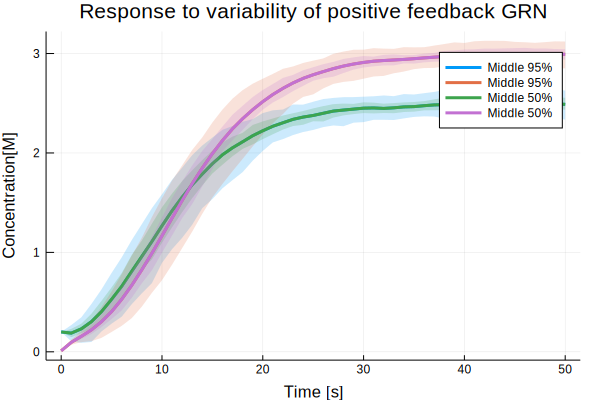

In [26]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
n=1
K=1
k_m=1
D=1
T=3
α_M=k_m*D
γ_M=0.3
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,T,n,α_P,γ_P,K];

prob6 = SDEProblem(PositiveFeedback!,NoiseFunction!,u₀,tspan,p)
prob7 = MonteCarloProblem(prob6)
sol7 = solve(prob7,num_monte=100,parallel_type=:threads);
summ7 = MonteCarloSummary(sol7,0:1:50)
plot(summ7,labels="Middle 95%")
summ8 = MonteCarloSummary(sol7,0:1:50;quantiles=[0.25,0.75])
plot!(summ8,labels="Middle 50%",legend=true)
title!("Response to variability of positive feedback GRN")
xlabel!("Time [s]")
ylabel!("Concentration[M]")

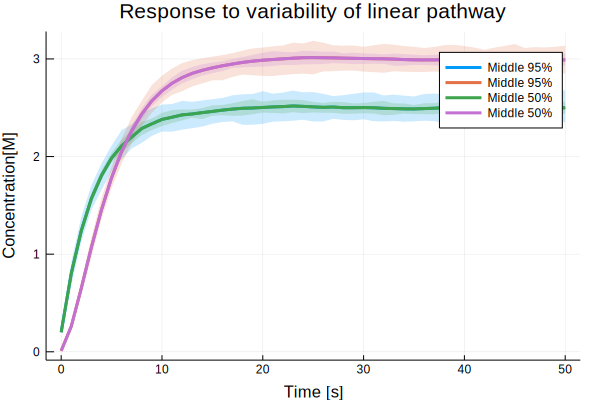

In [21]:
prob8 = SDEProblem(NoFeedback!,NoiseFunction!,u₀,tspan,p)
#sol8 = solve(prob8)
prob9 = MonteCarloProblem(prob8)
sol9 = solve(prob9,num_monte=100,parallel_type=:threads);
summ9 = MonteCarloSummary(sol9,0:1:50)
plot(summ9,labels="Middle 95%")
summ10 = MonteCarloSummary(sol9,0:1:50;quantiles=[0.25,0.75])
plot!(summ10,labels="Middle 50%",legend=true)
title!("Response to variability of linear pathway")
xlabel!("Time [s]")
ylabel!("Concentration[M]")

## Positive Feedbacks can add a bistability

One of the most important features of a positive feedback is the ability to add a bistable response. In other words, a positive feedback can provide the ingredients to generate two stable stady states. This bistable regime presents some relevant characteristics, such as dependence on the initial conditions.  The final steady state of teh system not only depends on the kinetic parameters of the interactions, but also on the initial conditions. This can be seen as a sort of memory or hysteresis: the system remembers its initial state and behaves transitioning to a final stetady state that depends on its initial value.  

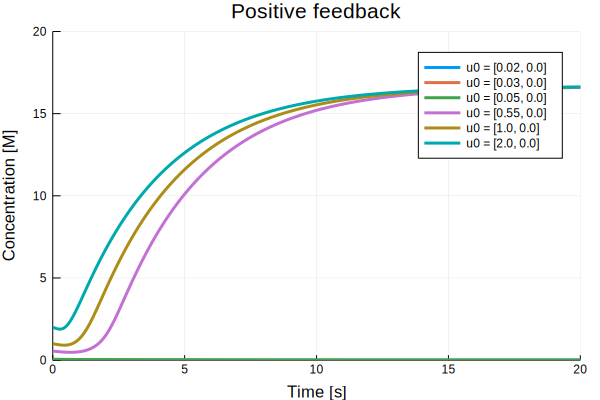

In [27]:
tspan = (0.0,20.0)
n=3
K=1
k_m=5
D=1
T=3
α_M=k_m*D
γ_M=0.3
α_P=1
γ_P=0.3
p=[α_M,γ_M,T,n,α_P,γ_P,K];



function PlotPositiveFeedback(a)
     u₀ = [a,0.0]
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(PositiveFeedback!,u₀,tspan,p)
     x=(" u0 = $u₀")
     sol1 = solve(prob1)
     plot!(sol1,vars=(1),label=x,ylims = (0,20))
end

plot()
for i in [0.02,0.03,0.05,0.55,1,2]
    PlotPositiveFeedback(i)
end
     xlabel!("Time [s]")
     ylabel!("Concentration [M]")
     title!("Positive feedback")

Close to this bifurcation is where noise amplification is higher. This is due to the presence of two basins of atraction. 

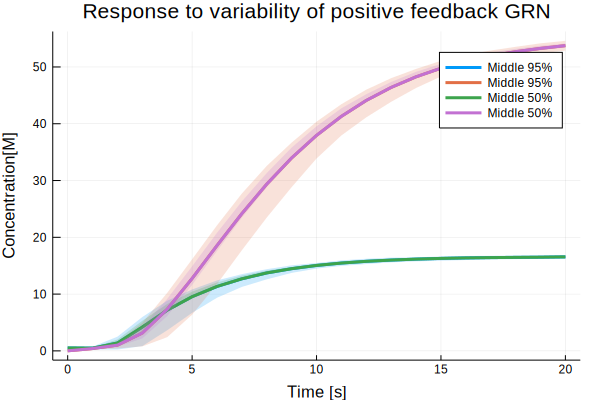

In [23]:
NoiseFunction! = @ode_def negFB begin
   dM = 0.16
   dP = 0.0
    end α_M γ_M T n α_P γ_P K

u₀ = [0.52,0.01]
prob6 = SDEProblem(PositiveFeedback!,NoiseFunction!,u₀,tspan,p)
prob7 = MonteCarloProblem(prob6)
sol7 = solve(prob7,num_monte=100,parallel_type=:threads);
summ7 = MonteCarloSummary(sol7,0:1:20)
plot(summ7,labels="Middle 95%")
summ8 = MonteCarloSummary(sol7,0:1:20;quantiles=[0.25,0.75])
plot!(summ8,labels="Middle 50%",legend=true)
title!("Response to variability of positive feedback GRN")
xlabel!("Time [s]")
ylabel!("Concentration[M]")

This amplification of noise can be compared with the behavior of the linear system, under consitions of similar noise intensity.

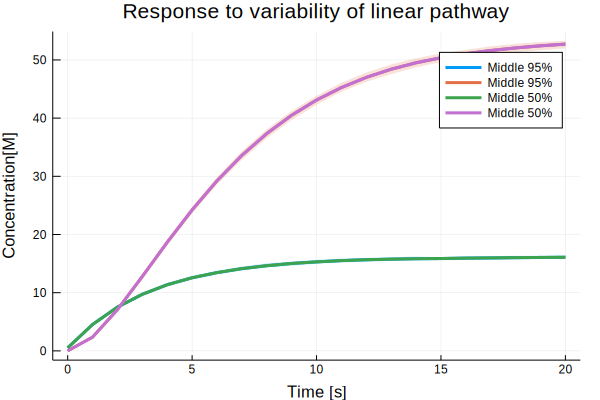

In [24]:
prob8 = SDEProblem(NoFeedback!,NoiseFunction!,u₀,tspan,p)
prob9 = MonteCarloProblem(prob8)
sol9 = solve(prob9,num_monte=100,parallel_type=:threads);
summ9 = MonteCarloSummary(sol9,0:1:20)
plot(summ9,labels="Middle 95%")
summ10 = MonteCarloSummary(sol9,0:1:20;quantiles=[0.25,0.75])
plot!(summ10,labels="Middle 50%",legend=true)
title!("Response to variability of linear pathway")
xlabel!("Time [s]")
ylabel!("Concentration[M]")

## Conclusion

We can clearly see that the variability in the output of the linear system is lower in linear networks than in networks with a positive feedback loop. In conclusion, the presence of a protein that activates directly or indirectly its own production induces the following properties and features in a fene regulatory network:

- Slower dynamics
- Delays
- worse performance with high cooperativity  
- Amplification of  changes in input
- Amplification of  noise
- Bistability, histereresis, dependence on initial conditions.

## Steady state analysis and Nullclines

To visualize the number of steady states, we solve the following equations:

$$
\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &= 0 \tag{6}\\ 
\frac{\mathrm{d} [P]}{\mathrm{d} t} &= 0
\end{align*}
$$

This leads us to the following:

$$
\begin{align*}
[P] &=  \frac{\alpha_m \alpha_P}{\gamma_M \gamma_P} \frac{[P]^n}{K^n+[P]^n} \tag{6}\\
[P] \cdot (K^n+[P]^{n}) &=  \frac{\alpha_m \alpha_P}{\gamma_M \gamma_P} [P]^n\\
K^n+[P]^{n} &=  \frac{\alpha_m \alpha_P}{\gamma_M \gamma_P} [P]^{n-1}
\end{align*}
$$

for the case `n=2` we have: 

$$
\begin{align*}
[P]^{2} -  \frac{\alpha_m \alpha_P}{\gamma_M \gamma_P}   [P] + K^2 =0 \tag{6}
\end{align*}
$$

which has as solution
$$
[P]=\frac{\frac{\alpha_m \alpha_P}{\gamma_M \gamma_P} \pm\sqrt{(\frac{\alpha_m \alpha_P}{\gamma_M \gamma_P} )^2-4  K^2}}{2}
$$

which are both positive if

$$
(\frac{\alpha_m \alpha_P}{\gamma_M \gamma_P})^2 > (\frac{\alpha_m \alpha_P}{\gamma_M \gamma_P} )^2-4  K^2
$$
which is allways true.

We can calculate teh numericaql value for this set of parameters:


In [95]:
P_ = LinRange(0,15,100)
n=2
K=1
k_m=5
D=1
α_M=k_m*D
γ_M=0.3
α_P=0.2
γ_P=0.3

B=(α_M*α_P/(γ_M*γ_P))
P1_0=(B+sqrt(B^2-4*K^2))/2
M1_0=(P1_0)*γ_P/α_P
println("solution 1 is [P] = $P1_0, [M] = 4$M1_0")
P2_0=(B-sqrt(B^2-4*K^2))/2
M2_0=(P2_0)*γ_P/α_P
println("solution 2 is [P] = $P2_0, [M] = 4$M2_0")

solution 1 is [P] = 11.020370056603529, [M] = 416.53055508490529
solution 2 is [P] = 0.09074105450758285, [M] = 40.13611158176137428



In addition, we can calculate and plot the nullclines. The solutions of the systen will be represented by crosses of the two nullclines. Therefore:

$$
\begin{align*}
f(M,P) &=  \alpha_m \frac{[P]^n}{K^n+[P]^n}-\gamma_M[M] \tag{6}\\ 
g(M,P) &=  \alpha_P [M]-\gamma_P[P]
\end{align*}
$$


$$
\begin{align*}
[M] &=  \frac{\alpha_m}{\gamma_M} \frac{[P]^n}{K^n+[P]^n} \tag{6}\\ 
[M] &=\frac{\gamma_P}{\alpha_P}[P]
\end{align*}
$$



In [85]:
M1 = α_M./γ_M.*P_.^n./(K.^n .+P_.^n)
M2 = γ_P./α_P.*P_

100-element Array{Float64,1}:
  0.0                
  0.22727272727272724
  0.4545454545454545 
  0.6818181818181818 
  0.909090909090909  
  1.1363636363636362 
  1.3636363636363635 
  1.5909090909090906 
  1.818181818181818  
  2.0454545454545454 
  2.2727272727272725 
  2.4999999999999996 
  2.727272727272727  
  ⋮                  
 19.999999999999996  
 20.227272727272723  
 20.454545454545453  
 20.68181818181818   
 20.909090909090907  
 21.136363636363633  
 21.36363636363636   
 21.590909090909086  
 21.818181818181817  
 22.045454545454543  
 22.27272727272727   
 22.499999999999996  

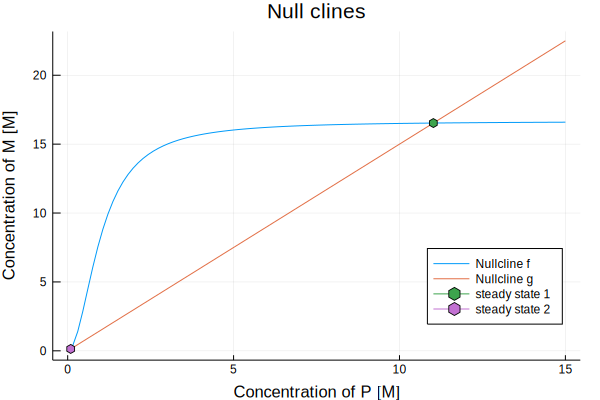

In [109]:
plot(P_,M1,label="Nullcline f")
plot!(P_,M2,label="Nullcline g")
title!("Null clines")
xlabel!(" Concentration of P [M]")
ylabel!("Concentration of M [M]")
plot!([P1_0],[M1_0],marker = :hexagon,label="steady state 1")
plot!([P2_0],[M2_0],marker = :hexagon,label="steady state 2",legend=:bottomright)

We see that, for these parameter values, the system of equations has two solutions that show the possible steady states of the system.

In [66]:
function PlotPositiveFeedback1(a)
     u₀ = [a,0.0]
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(PositiveFeedback!,u₀,tspan,p)
     x=(" u0 = $u₀")
     sol1 = solve(prob1)
     plot!(sol1,vars=(1),label=x,ylims = (0,20))
end

function PlotPositiveFeedback2(a)
     u₀ = [a,0.0]
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(PositiveFeedback!,u₀,tspan,p)
     x=(" u0 = $u₀")
     sol1 = solve(prob1)
     plot!(sol1,vars=(2),label=x,ylims = (0,15))
end

PlotPositiveFeedback2 (generic function with 1 method)

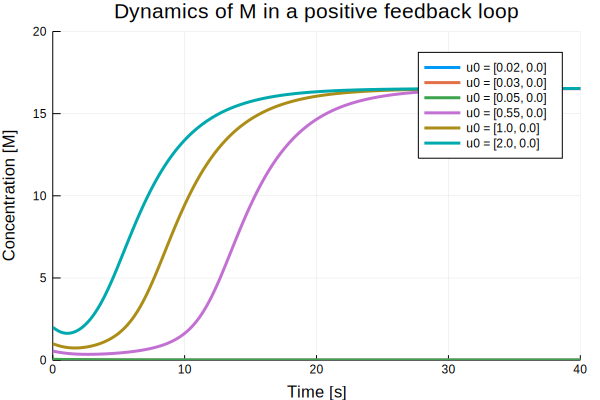

In [71]:
tspan = (0.0,40.0)
plot()
for i in [0.02,0.03,0.05,0.55,1,2]
    PlotPositiveFeedback1(i)
end
     xlabel!("Time [s]")
     ylabel!("Concentration [M]")
     title!("Dynamics of M in a positive feedback loop")

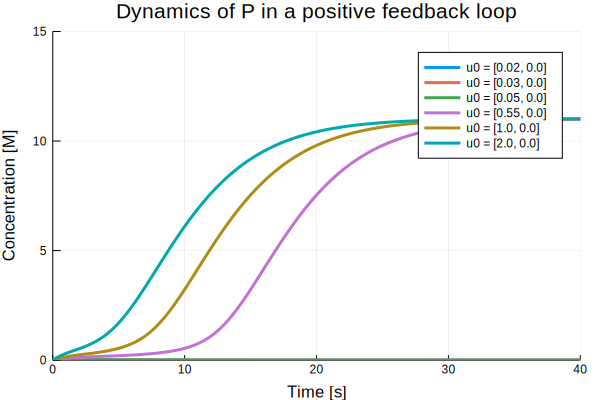

In [72]:
tspan = (0.0,40.0)
plot()
for i in [0.02,0.03,0.05,0.55,1,2]
    PlotPositiveFeedback2(i)
end
     xlabel!("Time [s]")
     ylabel!("Concentration [M]")
     title!("Dynamics of P in a positive feedback loop")